<a href="https://colab.research.google.com/github/ayush8587/whatsapp-chat-analyzer/blob/main/whatsapp_chat_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comprehensive Data Analysis on a WhatsApp Group Chat
##### *Author*: [Ayush Kumar](https://www.linkedin.com/in/singhayush16/)

## *Overview*
- Introduction
- Data Retrieval & Preprocessing
- Exploratory Data Analysis
- Data Visualization
- Data Interpretation
- Summarizing the Inferences
- Conclusion

# *Introduction*:

Whatsapp has quickly become the world’s most popular text and voice messaging application. Specializing in cross-platform messaging with over 1.5 billion monthly active users, this makes it the most popular mobile messenger app worldwide.



- I thought why not do **Data Analysis on a WhatsApp group chat** of *college students* and find out interesting insights about *who is most active, who are ghosts (the ones who do not reply), my sleep schedule,* *the most used emoji, the sentiment score of each person, who swears the most, the most actives times of the day, or does the group use phones during college teaching hours?*

- These would be some interesting insights for sure, more for me than for you, since the people in this chat are people I know personally.


## Beginning. How do I export my conversations? From Where To Obtain Data?

- The first step is **Data Retrieval & Preprocessing**, that is to **gather the data**. WhatsApp allows you to **export your chats** through a **.txt format**.

- Go to the respective chat, which you want to export!

<img src="https://imgur.com/lYd4A4J.png" width=200 length=200 align="center">
<!-- ![](https://imgur.com/lYd4A4J) -->

- Tap on **options**, click on **More**, and **Export Chat.**

<img src="https://imgur.com/KD0vCs1.png" width=200 length=200 align="center">
<!-- ![](https://imgur.com/KD0vCs1.png) -->

- I will be Exporting **Without Media.**

#### NOTE:
- Without media: exports about **40k messages **
- With media: exports about *10k messages along with pictures/videos*
- While exporting data, *avoid including media files* because if the number of media files is greater than certain figure then not all the media files are exported.

<img src="https://imgur.com/BlQx2dl.png" width=300 length=300 align="center">
<!-- ![](https://imgur.com/BlQx2dl) -->

## Opening this .txt file up, you get messages in a format that looks like this:

![](https://imgur.com/PshTlcq.png)


# *Importing Necessary Libraries*

We will be using :
1. **Regex (re)** to extract and manipulate strings based on specific patterns.
    - References:
        - [Regex - Python Docs](https://docs.python.org/3/library/re.html)
        - [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
        - [Regex Test - live](https://regexr.com/)
        - [Datetime Format](http://strftime.org/)
2. **pandas** for analysis.
3. **matlotlib** and **seaborn** for visualization.
4. **emoji** to deal with emojis.
    - References:
        - [Python Docs](https://pypi.org/project/emoji/)
        - [Emoji](https://github.com/carpedm20/emoji)
        - [EMOJI CHEAT SHEET](https://www.webfx.com/tools/emoji-cheat-sheet/)
5. **wordcloud** for the most used words.
6. **googletrans** for translating the message which will help in Sentiment Analysis.
7. **urlextract** for extracting URLs from the messages.

In [1]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=6ede5b72f1bf9ffcd94c7e6f248a8a33e7ad9e73077ee376c36fab7f77e6ac52
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [2]:
!pip install urlextract

In [3]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.7 MB/s eta 0:00:00


In [1]:
import re
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import warnings
from googletrans import Translator
from urlextract import URLExtract

%matplotlib inline
warnings.filterwarnings('ignore')

##### NOTE:
- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

#### *NOTE*:
- Since WhatsApp texts are *multi-line*, you cannot just read the file line by line and get each message that you want. Instead, you need a way to *identify* if a line is a new message or part of an old message. You could use regular expressions.
- While reading each line, I split it based on a comma and take the first item returned from the `split()` function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

In [2]:
import re
import pandas as pd

def preprocess(data):
    pattern='\[\d{2}/\d{2}/\d{2},\s\d{2}:\d{2}:\d{2}\]\s'
    date_pattern = r'\[(\d{2}/\d{2}/\d{2})'
    time_pattern = r', (\d{2}:\d{2}:\d{2})\]'

    messages=re.split(pattern,data)[1:]

    dates=re.findall(pattern,data)

    date_list=[]
    time_list=[]
    for date in dates:
        date_match = re.search(date_pattern,date)
        time_match = re.search(time_pattern,date)
        date_list.append(date_match.group(1))
        time_list.append(time_match.group(1))

    df=pd.DataFrame({'message':messages,'dates':date_list,'time':time_list})
    df['date_time']=df['dates'] + " " + df['time']
    df['date_time']=pd.to_datetime(df['date_time'])

    user=[]
    message=[]
    for msg in df['message']:
        entry=re.split('([\w\W]+?):\s',msg)
        user.append(entry[1])
        if entry[2]:
            message.append(entry[2])
        elif entry[3]:
            message.append(entry[3])
    df['user']=user
    df['message']=message

    df.drop(['dates','time'],axis=1,inplace=True)

    df['date']=df['date_time'].dt.date
    df['day_name']=df['date_time'].dt.day_name()
    df['month']=df['date_time'].dt.month_name()
    df['month_num']=df['date_time'].dt.month
    df['year']=df['date_time'].dt.year
    df['hour']=df['date_time'].dt.hour
    df['minute']=df['date_time'].dt.minute
    df['day']=df['date_time'].dt.day

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period

    df.drop('date_time',axis=1,inplace=True)

    return df

In [3]:
with open('/content/whatsapp-chat-data.txt','r',encoding="utf-8") as f:
  data=f.read()
  df=preprocess(data)

## *Prior Information of my Whatsapp Data*
- This is my most active college group.
- It has **76** participants.
- This group was made in **September 2021.**

## Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 0 to 1930
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    1931 non-null   object
 1   user       1931 non-null   object
 2   date       1931 non-null   object
 3   day_name   1931 non-null   object
 4   month      1931 non-null   object
 5   month_num  1931 non-null   int64 
 6   year       1931 non-null   int64 
 7   hour       1931 non-null   int64 
 8   minute     1931 non-null   int64 
 9   day        1931 non-null   int64 
 10  period     1931 non-null   object
dtypes: int64(5), object(6)
memory usage: 166.1+ KB


### The dataset contains 11 columns, and 1931 respective entries.
- Here is how it looks like:

In [5]:
df.sample(10)

,message,user,date,day_name,month,month_num,year,hour,minute,day,period
1684,Dear students,‪+91 99998 85200‬,2023-05-16,Tuesday,May,5,2023,13,39,16,13-14
1562,Remaining students reach to the class immedia...,‪+91 99530 28888‬,2023-07-04,Tuesday,July,7,2023,13,40,4,13-14
1161,‎This message was deleted.\n,~ Tarun Kumar,2022-07-18,Monday,July,7,2022,14,15,18,14-15
1377,https://youtu.be/KPQ3nGUJL7A\n\n*जनता वैदिक इं...,~ Dr Kuldeep Malik,2022-12-20,Tuesday,December,12,2022,16,41,20,16-17
45,A1 students also send me your screen shot in m...,‪+91 80524 39459‬,2021-09-17,Friday,September,9,2021,10,56,17,10-11
1119,These students will be detailed from Universit...,‪+91 99998 85200‬,2022-03-07,Monday,March,3,2022,11,10,7,11-12
935,Time Table CSE Deptt Even Sem W.E.F 04.05.2022...,Yogesh Sir,2022-03-05,Saturday,March,3,2022,9,29,5,9-10
1057,Assignment 3_CSS.docx ‎document omitted\n‎,~ 🌸~~Ashu~~~🌸,2022-06-22,Wednesday,June,6,2022,14,39,22,14-15
1783,Received 6 responses till now\n,~ sarikagarwal it,2023-07-29,Saturday,July,7,2023,10,26,29,10-11
295,Roll no. 06 also present\n,‪+91 80524 39459‬,2021-09-11,Saturday,September,9,2021,12,1,11,12-13


### Added extra *helper columns for analysis and visualization* such as
- df['day']
- df['month']
- df['year']
- df['date']

### Removal of URLs and special characters to clean Data.

In [6]:
url=URLExtract()
urls=[]
for i in df['message']:
    link=url.find_urls(i)
    if link:
        urls.extend(link)

In [7]:
def remove_links(text):
    x=[]
    for word in text.split():
        if word not in urls:
            x.append(word)
        else:
            x.append(' ')
    return " ".join(x)

In [8]:
df['message']=df['message'].apply(lambda x:x.replace('\n',' '))
df['message']=df['message'].apply(remove_links)

# Now that we have a clean DataFrame to work with, it’s time to perform analysis on it.
### Final Data Frame

In [9]:
df

,message,user,date,day_name,month,month_num,year,hour,minute,day,period
0,‎Messages and calls are end-to-end encrypted. ...,CSE 4th Year A 20-24,2021-08-09,Monday,August,8,2021,12,30,9,12-13
1,‎~ Ashish Gupta created group “CSE 2nd Year A ...,~ Ashish Gupta,2021-08-09,Monday,August,8,2021,10,19,9,10-11
2,‎‪+91 95405 03543‬ added you,CSE 4th Year A 20-24,2021-08-09,Monday,August,8,2021,12,30,9,12-13
3,‎‪+91 95405 03543‬ added Devesh,Devesh,2021-08-09,Monday,August,8,2021,12,46,9,12-13
4,"Dear all , If you have any doubt so Call me di...",‪+91 80524 39459‬,2021-08-09,Monday,August,8,2021,14,22,9,14-15
...,...,...,...,...,...,...,...,...,...,...,...
1926,2002220100007 Abhinav Verma 2002220100014 Adit...,~ sarikagarwal it,2023-05-10,Wednesday,May,5,2023,15,47,10,15-16
1927,"As you are aware, these students have been reg...",~ sarikagarwal it,2023-05-10,Wednesday,May,5,2023,15,47,10,15-16
1928,‎image omitted ‎,~ 🌸~~Ashu~~~🌸,2023-05-10,Wednesday,May,5,2023,18,56,10,18-19
1929,Tentative Project Details Final Year till 05.1...,~ 🌸~~Ashu~~~🌸,2023-05-10,Wednesday,May,5,2023,18,57,10,18-19


# *Data Analysis*

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist).**
- Ghosts present in the group. (shocking results.)

**4. Top 10 users most sent media.**

**5. Top 10 most used emojis.**

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

**8. Sentiment Analysis**
 - Translation of text
 - Assigning Positive and Negative Score to each text.
 - Visualizing Overall Sentiment

# 1. Overall frequency of total messages on the group.
- I will first do this to get a look at overall data.

I will plot a simple line graph to see the frequency of messages over the months.
##### I expect to see a nice line graph with crests and troughs in odd places.

In [36]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,month_num,hour,minute,day,message_count
0,2021-01-10,6,70,201,60,6
1,2021-01-11,5,47,137,55,5
2,2021-01-12,4,63,126,48,4
3,2021-02-12,8,40,74,48,4
4,2021-03-12,3,9,16,12,1
...,...,...,...,...,...,...
464,2023-11-08,66,96,68,48,6
465,2023-12-02,12,21,44,2,1
466,2023-12-04,168,231,250,56,14
467,2023-12-07,12,17,13,7,1


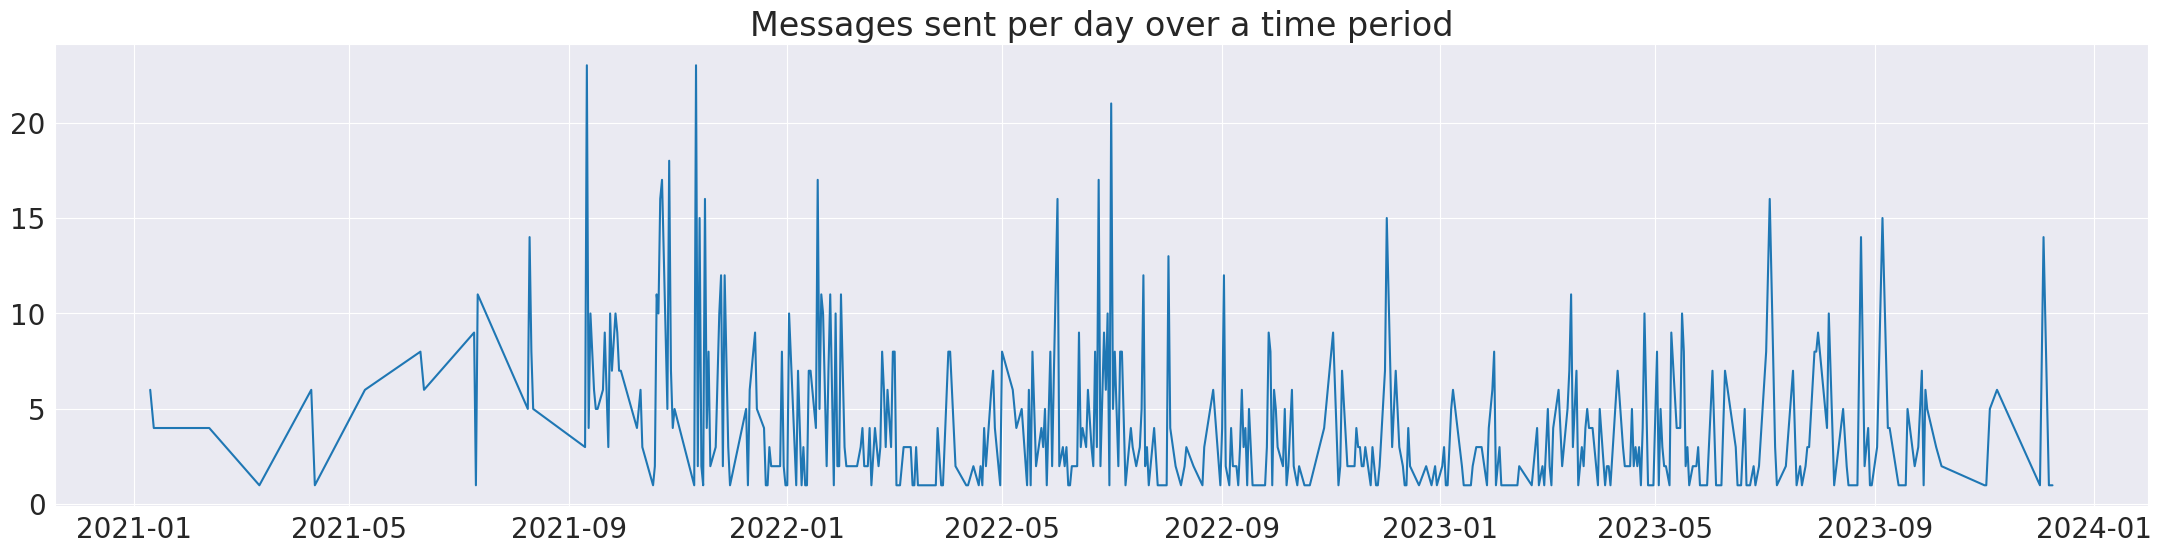

In [37]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# 2 *Top 10 most active days.*

In [38]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,month_num,hour,minute,day,message_count
0,2021-09-11,207,341,504,253,23
1,2021-11-11,253,284,690,253,23
2,2022-07-01,147,233,527,21,21
3,2021-10-27,180,272,679,486,18
4,2022-01-18,17,187,326,306,17
5,2022-06-24,102,218,516,408,17
6,2021-10-23,170,187,420,391,17
7,2021-11-16,176,228,483,256,16
8,2022-06-01,96,210,113,16,16
9,2023-07-04,112,283,683,64,16


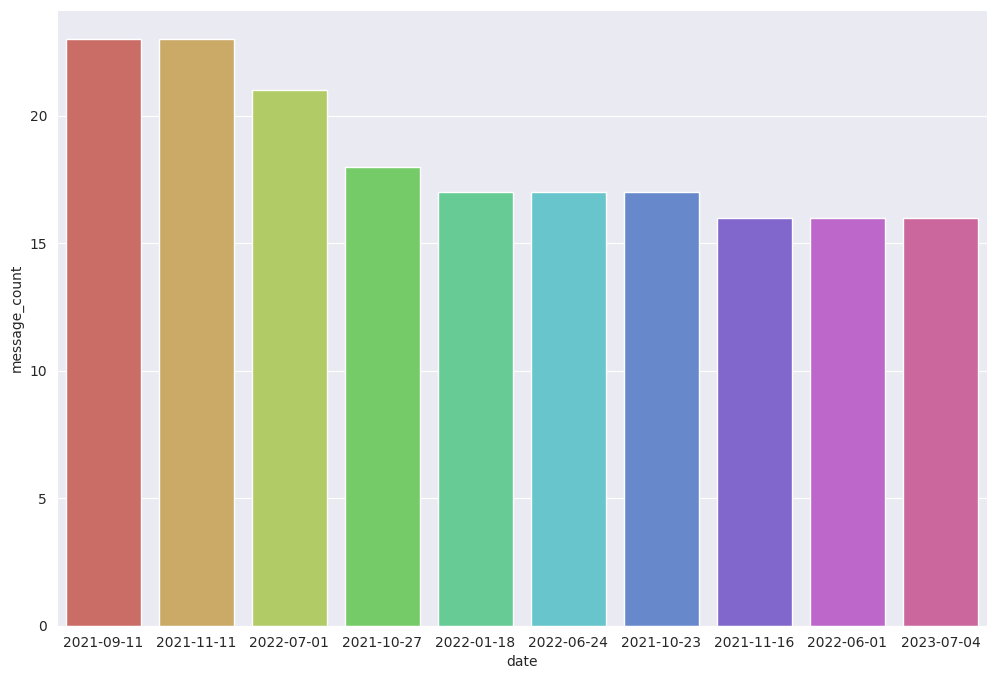

In [39]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(x=top10days.date, y=top10days.message_count, palette="hls");

#### Apparently, the group was very active on 13th Spetember'20
- Because we were discussing fundamental yet tricky and brain-wracking "Guess the Output" Java questions!

# 3. Top 10 active users on the group.

## Now, pre-processing top 10 active users.

In [41]:
df2 = df.copy()
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,~ Ashish Gupta,263
1,‪+91 80524 39459‬,171
2,~ ABHISHEK SHIVHARE🇮🇳🇮🇳,147
3,‪+91 95405 03543‬,133
4,‪+91 70235 74691‬,125
5,~ Vrinda,124
6,‪+91 83099 50609‬,96
7,‪+91 99998 85200‬,86
8,~ 🌸~~Ashu~~~🌸,71
9,~ sarikagarwal it,63


## Now, visualizing top 10 active users.

In [42]:
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

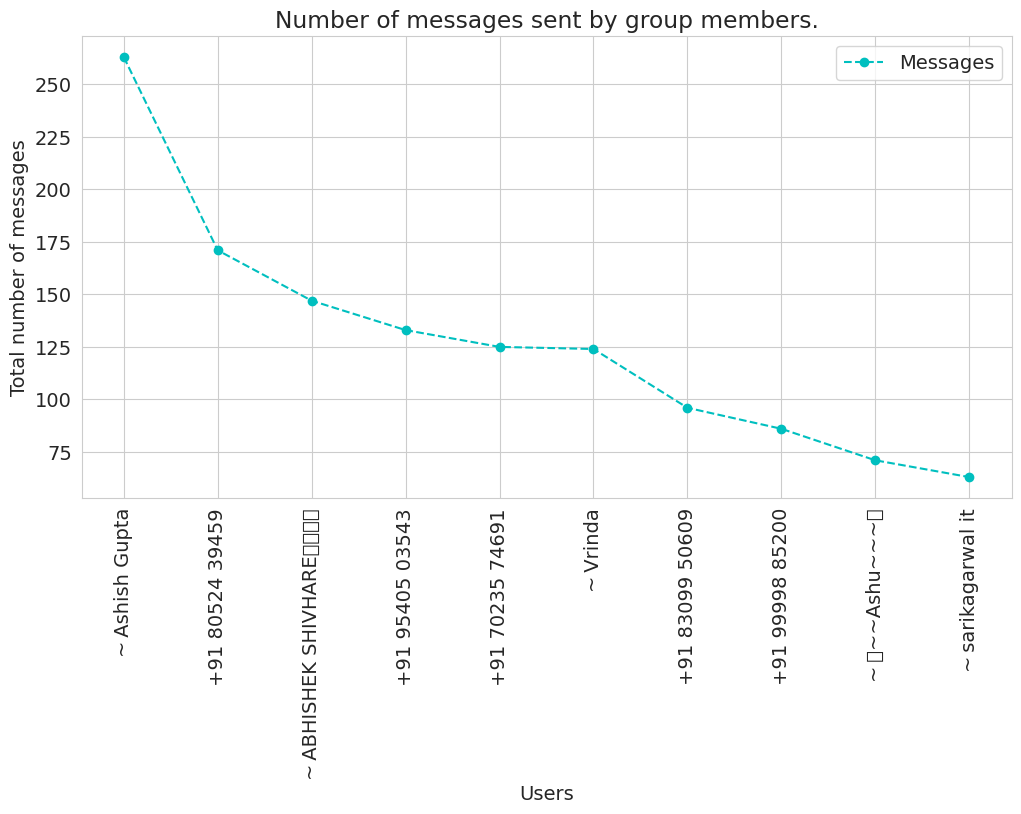

In [43]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

# BETTER IMPLEMENTATION using the `fmt` argument;
plt.plot(top10df.user, top10df.message, 'o--c')

# Labels and Title
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.xticks(rotation=90)

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

#### *Plotting a bar chart and line graph together.*

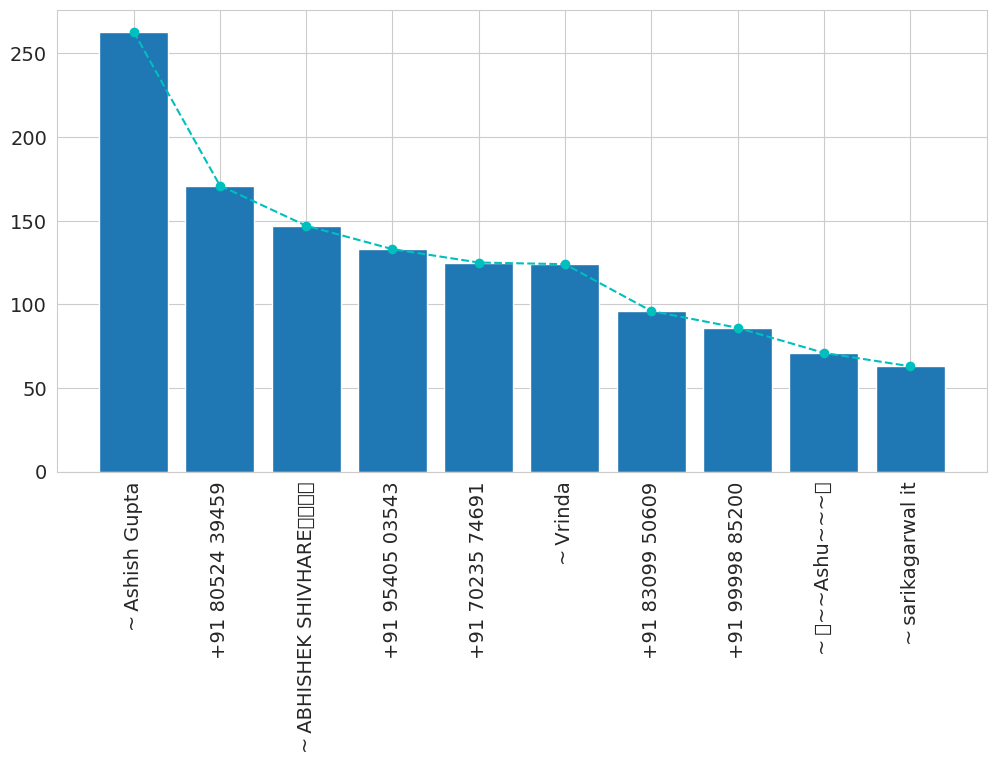

In [44]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

plt.bar(top10df.user, top10df.message)   # basic bar chart
plt.plot(top10df.user, top10df.message, 'o--c');   # line chart
plt.xticks(rotation=90)
plt.show()

### *Beautifying Default Styles using Seaborn*

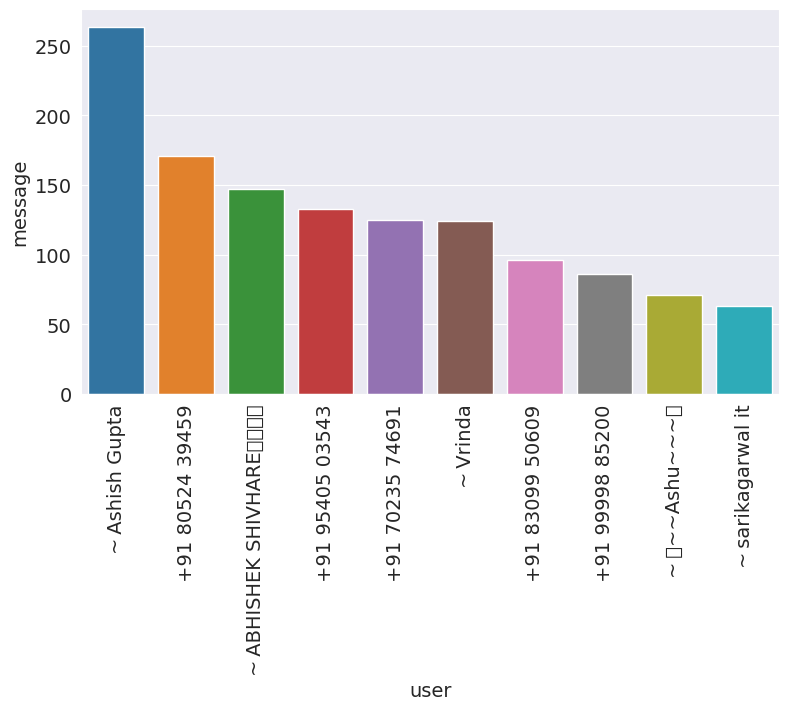

In [45]:
# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")
sns.barplot(x=top10df.user, y=top10df.message, data=top10df);
plt.xticks(rotation=90)
plt.show()

# *Important Note*

- Since almost all the plots will be ***comparing* one person with another**, I’ll assign a **specific colour to each person** so that it becomes **easy to identify** each person among *multiple plots*.

- I could've used *seaborn's color palette* but:
    - Seaborn assigns default colors itself, but i wanted the color of a **certain person remains the same, no matter the plot**;
    - Also, I wanted to try some different colors so I grabbed my **colour palette** from https://coolors.co/

- Next, I made a dictionary where each key is the name and the value for each would be their assigned colour. I create a function which reorders colours given a list of names to match the ordering of the plot. This function takes the ordered names as input and returns a reordered list of colours. This list has to be passed into the `pallete` argument in a seaborn plotting function.

## Defining a function to tackle the problem.

I'm defining the following function to ***maintain consistent colors for each person across all plots***. Since the order will vary depending on the plot, this is passed to the function which will reorder colors in a particular order so that **the color of a certain person remains the same no matter the plot**. This will help maintain **consistency and readability** amongst the many graphs I will be plotting.


In [46]:
def get_colors_of_certain_order(names_in_certain_order):
    '''the color of a certain person remains the same, no matter the plot'''

    order = list(names_in_certain_order)
    return_list = []

    for name in order:
        return_list.append(color_dict[name])

    return return_list

### Now, we have a really nice set of colours for each person, with which we can visualize using `sns.palplot`.

{'~\u202fAshish Gupta': '#F94144',
 '\u202a+91\xa080524\xa039459\u202c': '#F3722C',
 '~\u202fABHISHEK SHIVHARE🇮🇳🇮🇳': '#F8961E',
 '\u202a+91\xa095405\xa003543\u202c': '#FDC500',
 '\u202a+91\xa070235\xa074691\u202c': '#F9C74F',
 '~\u202fVrinda': '#90BE6D',
 '\u202a+91\xa083099\xa050609\u202c': '#43AA8B',
 '\u202a+91\xa099998\xa085200\u202c': '#577590',
 '~\u202f🌸~~Ashu~~~🌸': '#6D597A',
 '~\u202fsarikagarwal it': '#003F88'}

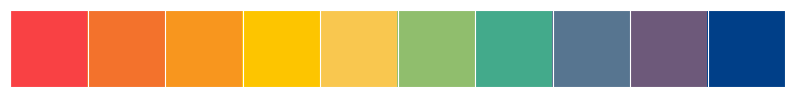

In [47]:
colors = ['#F94144', '#F3722C', '#F8961E', '#FDC500', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#003F88']
sns.palplot(colors)    # visualizing the colors' list

names = top10df.user

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

## Now, finding the *average message length* of the 10 most active users of the group.

In [48]:
# Adding another column for message length; using the apply method;
df2['message_length'] = df2['message'].apply(lambda x: len(x))

# Creating another dataframe for average length per user;
avg_msg_lengths = df2.groupby(df2.user).mean().reset_index().sort_values(by = 'message_length', ascending = False)

# Creating helper columns;
top10df['avg_message_length'] = [0] * 10
i, j = 0, 0
while i < 10:
    if top10df['user'][i] == avg_msg_lengths['user'][j]:
        top10df['avg_message_length'][i] = avg_msg_lengths['message_length'][j]
        i += 1
        j = -1
    j += 1

# Sorting the average message lengths of the same to 10 active users;
top10df_msg = top10df.sort_values(by = "avg_message_length", ascending=False)

## Now, we will be plotting *most sent messages* and respective *average message lengths* simultaneously, to see some interesting results.
- Plotting multiple charts in a grid
    - Matplotlib and Seaborn also support plotting multiple charts in a grid, using `plt.subplots`, which returns a set of axes that can be used for plotting.

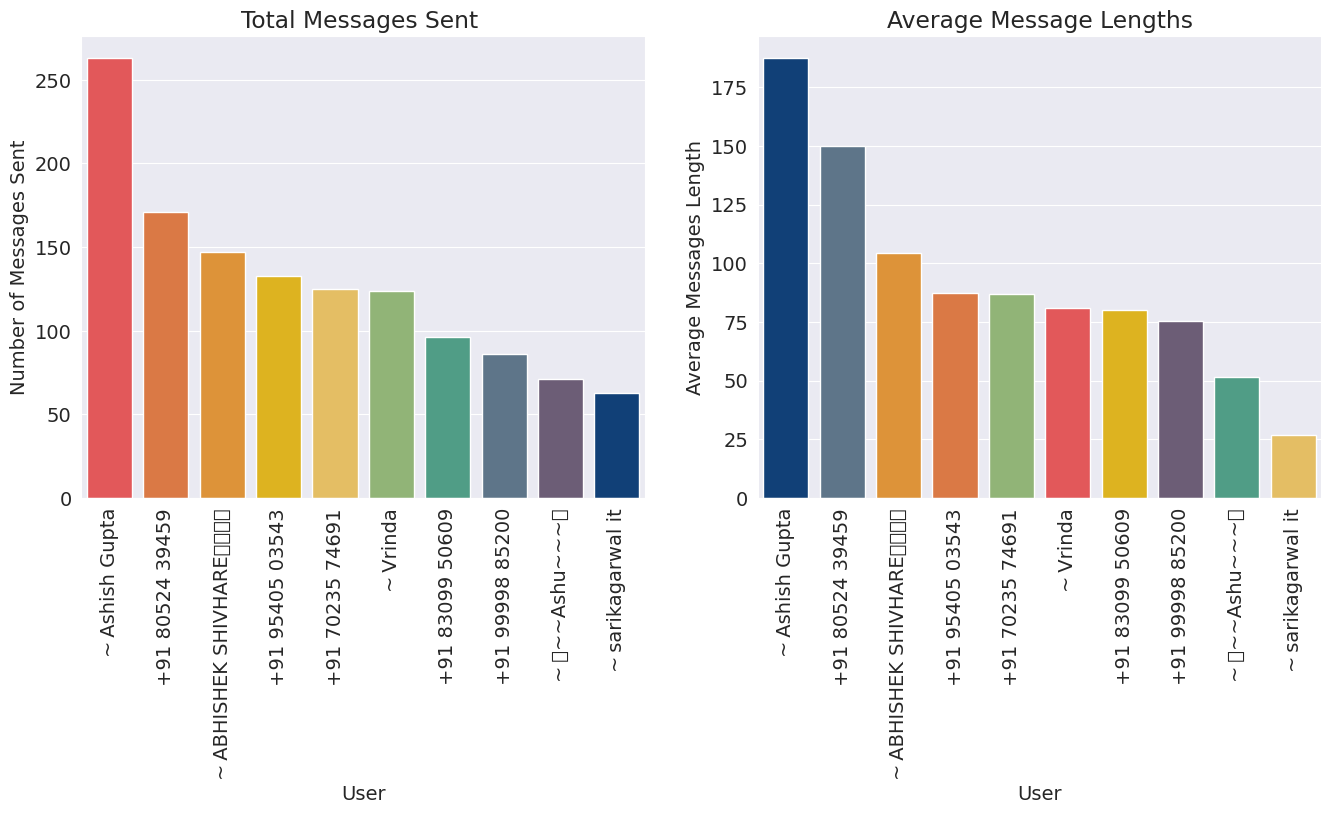

In [49]:
# plotting multiple charts in a grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("darkgrid")

# Plot 1 - Countplot of total messages sent
sns.barplot(x=top10df.user, y=top10df.message, data=top10df, ax = axes[0], palette=get_colors_of_certain_order(top10df.user))
axes[0].set_xticklabels(labels=top10df.user,rotation=90)
axes[0].set_title('Total Messages Sent ')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages Sent')

# Plot 2 - Barplot of those top 10 users' average message lengths
sns.barplot(x=top10df_msg.user, y=top10df_msg.avg_message_length, ax = axes[1], palette = get_colors_of_certain_order(top10df_msg.user))
axes[1].set_xticklabels(labels=top10df.user,rotation=90)
axes[1].set_title('Average Message Lengths')
axes[1].set_xlabel('User');
axes[1].set_ylabel('Average Messages Length');

# 4. Top 10 users most sent media

- The exported chats were exported without any media files.

### *Pre-processing*
**We can use this to filter out and see who sends the most media.**

In [50]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message.str.contains("omitted")].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date', 'day_name', 'month', 'month_num', 'year', 'hour','minute', 'day', 'period'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

### *Visualization using different Seaborn's Color Palettes*
- [Seaborn References](http://seaborn.pydata.org/tutorial/color_palettes.html#using-circular-color-systems)
- [Seaborn's Different Colors](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)
- [Seaborn's Color Visualization](https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/)

###### QUICK HACK
- to get **all possible Seaborn's color palettes**:
    - Just put a random input `palette="xyz"`
    - It will then show an error, showing all possible palettes you can try out from!

### Which user sends the most media?

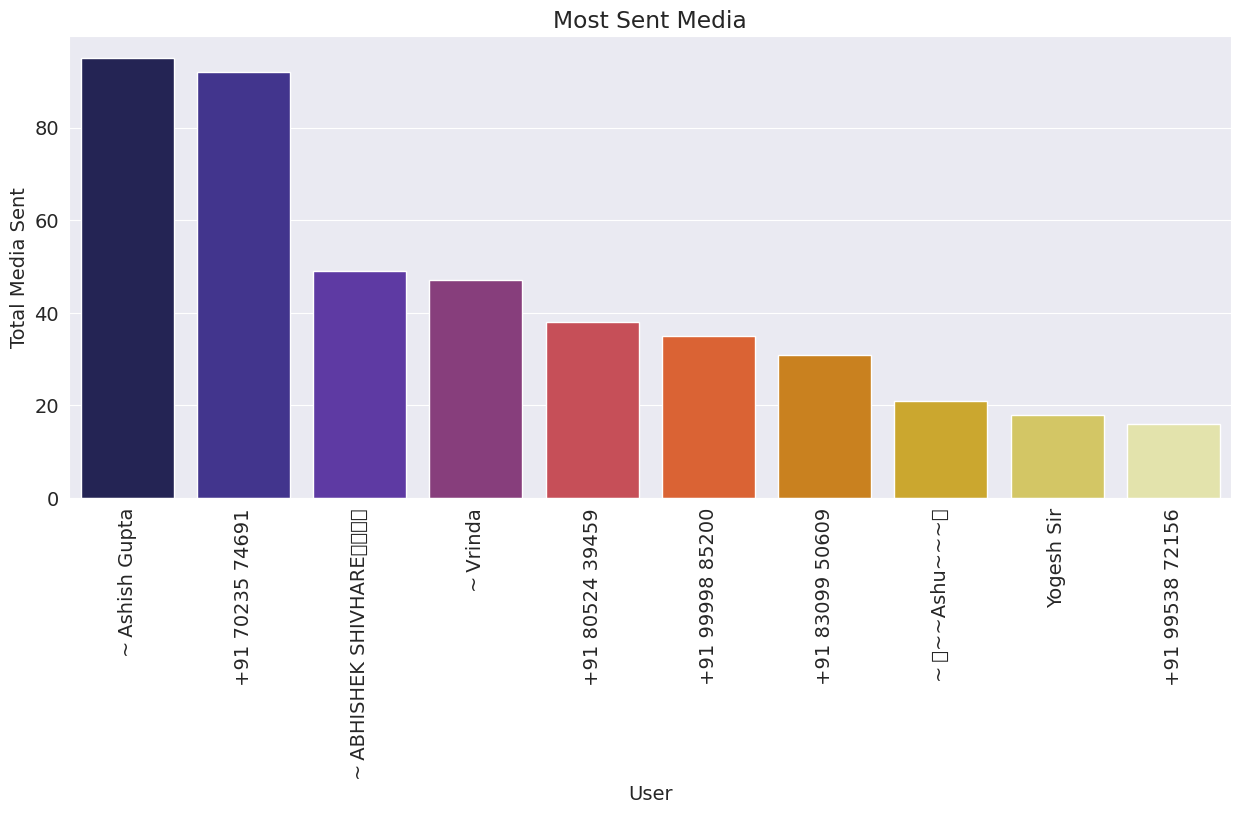

In [51]:
# Increasing the figure size
plt.figure(figsize=(15, 6))

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph;
sns.barplot(x=top10media.user, y=top10media.media_sent, palette="CMRmap");

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');
plt.xticks(rotation=90)
plt.show()

# 5. Top 10 most used Emojis
- Will be using the `emoji` module, that was imported earlier.

In [52]:
from collections import Counter

In [53]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.EMOJI_DATA.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

#### Will create another helper column using `emoji.demojize("<emoji>")`, since emojis will not rendered.

In [54]:
top10emojis = pd.DataFrame()
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    # will be using another helper column, since during visualization, the emojis won't be rendered.
    description = emoji.demojize(item[0])[1:-1]    # using `[1:-1]` to remove the colons ':' at the end of the demojized strin

    # appending top 10 data of emojis.
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,➖,27,minus
1,🌸,21,cherry_blossom
2,🙏,17,folded_hands
3,🇮🇳,16,India
4,🌴,12,palm_tree
5,🪴,10,potted_plant
6,▪️,10,black_small_square
7,👇,7,backhand_index_pointing_down
8,📍,7,round_pushpin
9,💻,7,laptop


### Which Emoji is the most used in the chat?

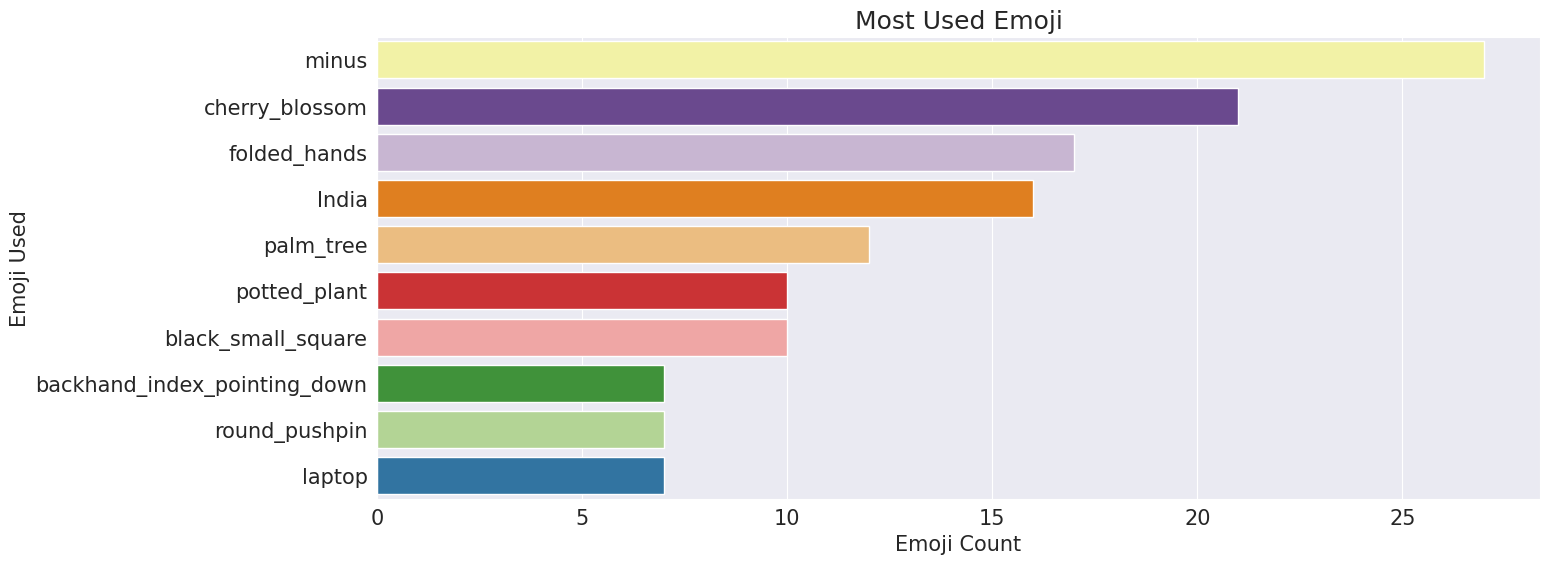

In [55]:
# Increasing the figure size
plt.figure(figsize=(15, 6))

# Better Readablity
matplotlib.rcParams['font.size'] = 15

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;
sns.barplot(x=top10emojis.emoji_count, y=top10emojis.emoji_description, palette = "Paired_r")

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used');

#### "➖" beats everyone by a huge margin!

# 6. Most active days, most active hours, most active months.

### *Pre-processing*

In [56]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

### Which hour of the day are most messages exchanged?

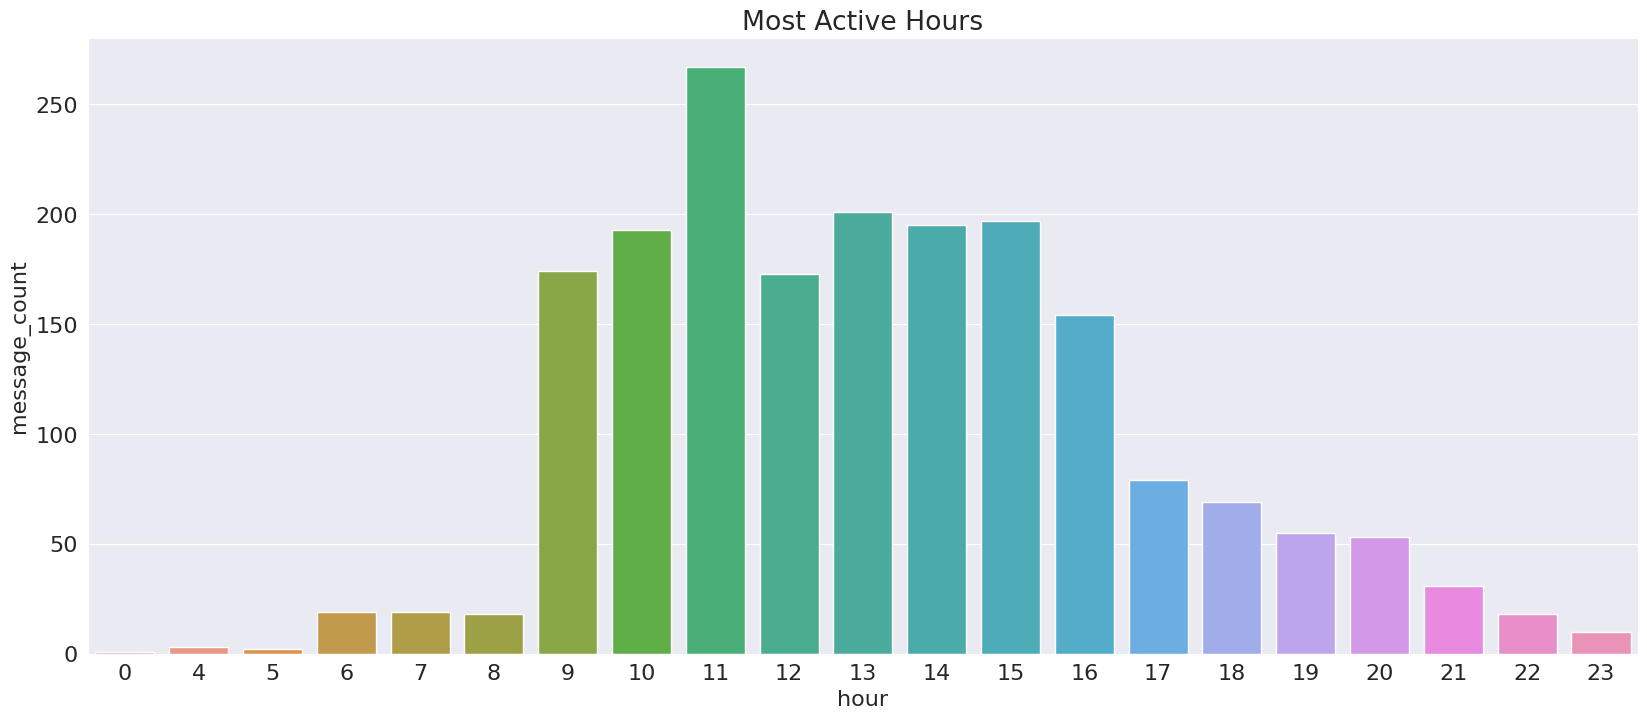

In [57]:
# Better Readablity
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x=grouped_by_time.hour, y=grouped_by_time.message_count)
plt.title('Most Active Hours');

#### Intrestingly, the group is *most active around afternoon*.

### *Pre-processing weekdays and months*

In [58]:
# specific `order` to be printed in;
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# grouping by day;
grouped_by_day = df3.groupby('day_name').sum().reset_index()[['day_name', 'message_count']]

# specific `order` to be printed in;
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# grouping by month;
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

## *Visualization*
### Now, we will be plotting *grouped by day* and respective *group by month* simultaneously, to see some interesting results.
- Using `plt.subplots` to plot multiple charts in a grid.

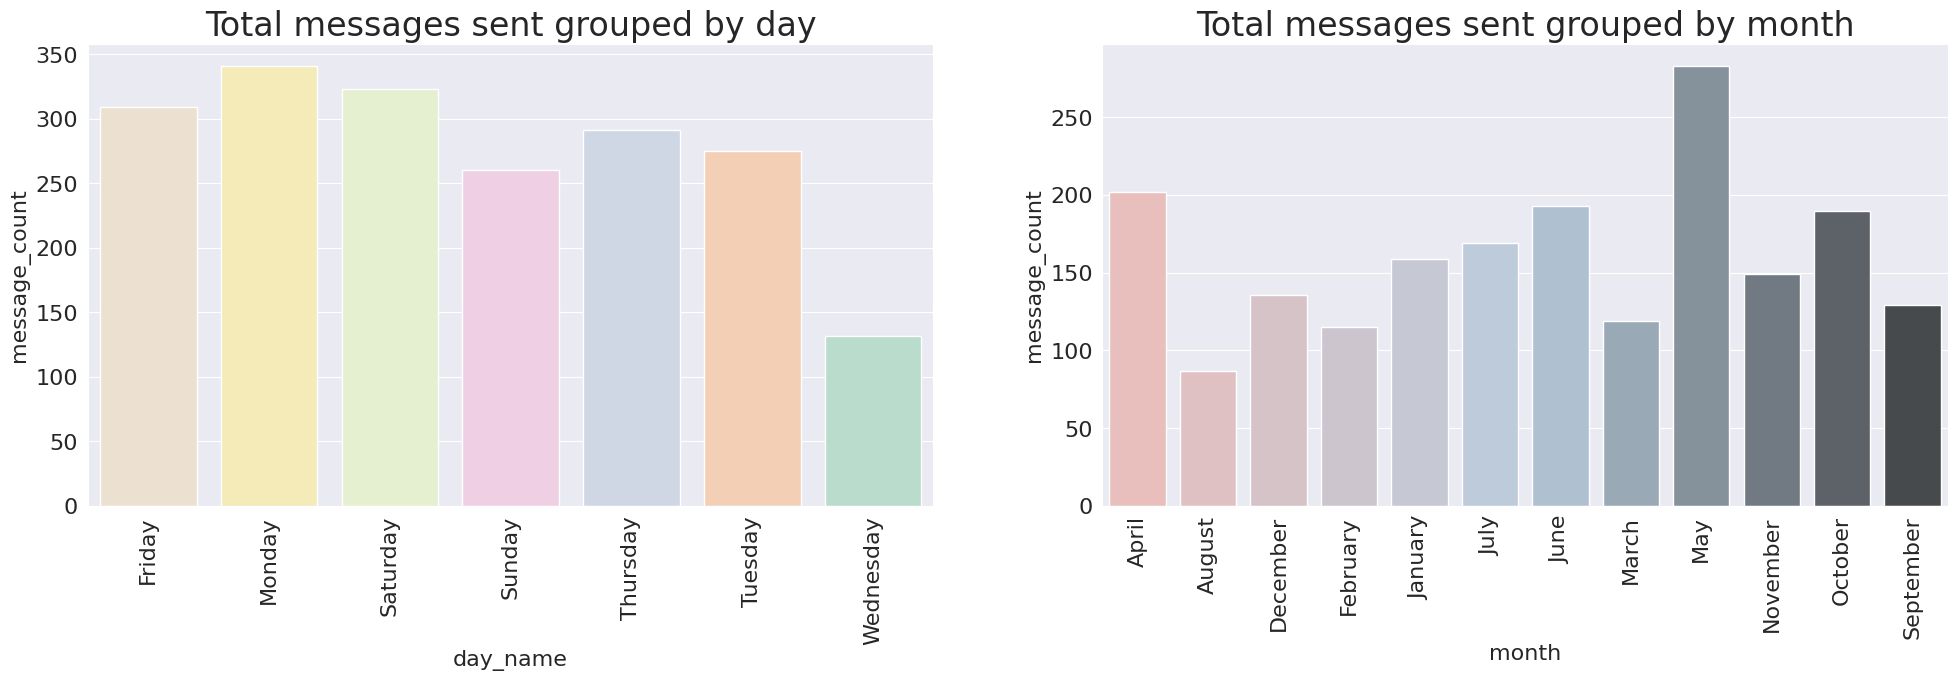

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))

# Better Readablity
matplotlib.rcParams['font.size'] = 20

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;

# PLOT 1: Messages grouped by weekday
sns.barplot(x=grouped_by_day.day_name, y=grouped_by_day.message_count, order=days, ax = axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')
axs[0].set_xticklabels(grouped_by_day.day_name,rotation=90)

# PLOT 2: Messages grouped by months
sns.barplot(x = grouped_by_month.month, y=grouped_by_month.message_count, order = months, ax = axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month');
axs[1].set_xticklabels(grouped_by_month.month,rotation=90)

plt.show()

##### The group is most active on Mondays, and least active on Wednesdays
##### It has been very active, in May.

### Now, we will plot a *heatmap*, combining the above to bar plots, for a better understanding!

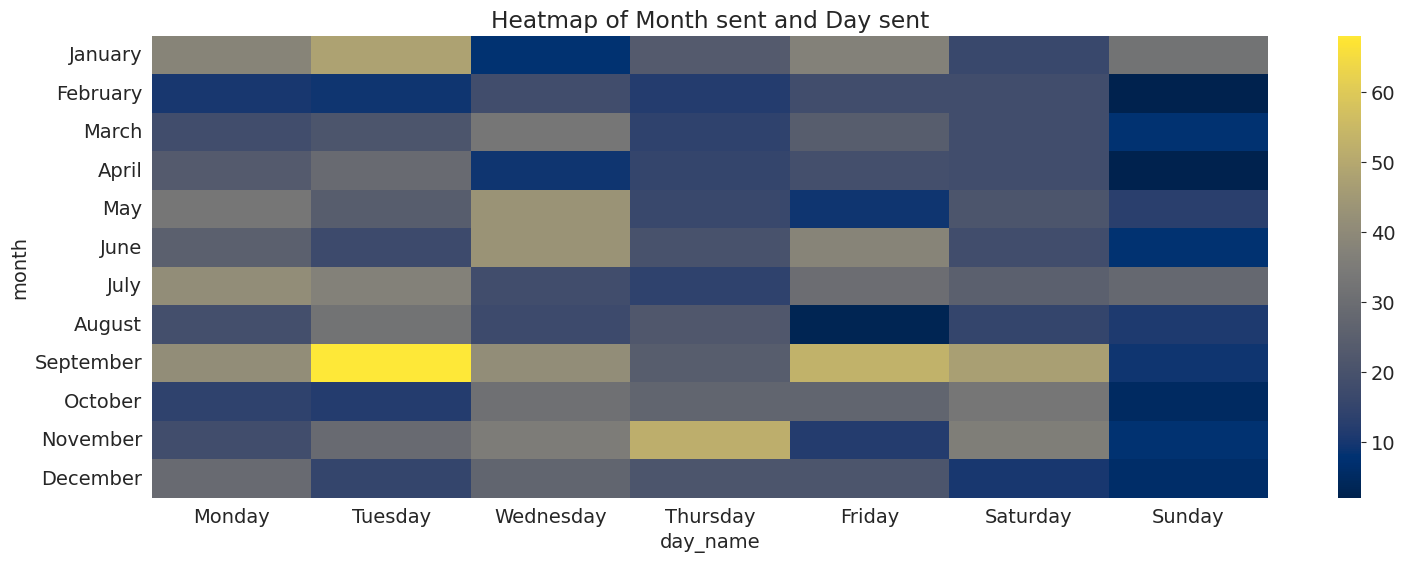

In [60]:
# Better Readablity
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)

# Beautifying Default Styles using Seaborn,
sns.set_style("darkgrid")

# Pre-Processing by month and day,
grouped_by_month_and_day = df3.groupby(['month', 'day_name']).sum().reset_index()[['month', 'day_name', 'message_count']]

# creating a pivot table,
pt = grouped_by_month_and_day.pivot_table(index = 'month', columns = 'day_name', values = 'message_count').reindex(index = months, columns = days)

# PLOT: heatmap.
sns.heatmap(pt, cmap = 'cividis');
plt.title('Heatmap of Month sent and Day sent');

# *Inferences*
- The group is least active on weekends, throughout the months.
- September has the most lighter blue shades and more yellow gradients.
- This gives a combined analysis, which is really helpful in real-time projects.

# 7. Most used words in the chat.
### *the most used words*, using `WordCloud` module in Python.

In [61]:
comment_words = ' '
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'image', 'document', 'pdf', 'https', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

for val in df3.message.values:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words)

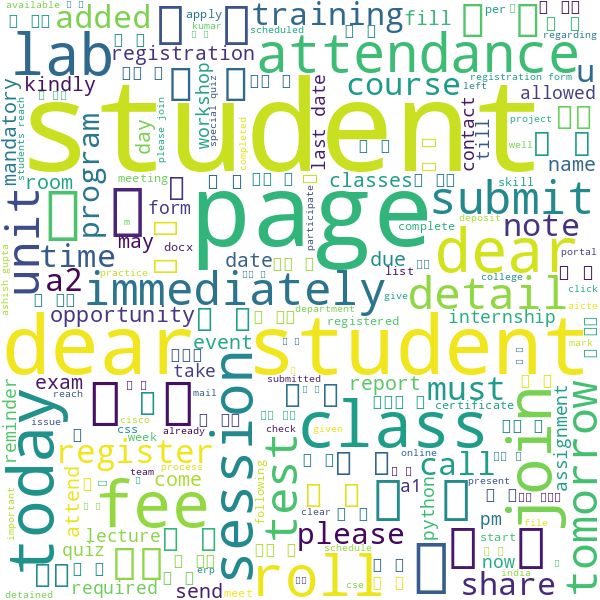

In [62]:
wordcloud.to_image()

# 8. Sentiment Analysis.

### **Translation**

Translated the Messages using the below function and stores in the csv file named as **translated_text.csv**

In [11]:
from googletrans import Translator
translator = Translator(service_urls=['translate.google.com'])
def translation(Text):
    if Text==' ':
        return Text
    elif "omitted" in Text or "added" in Text or "removed" in Text:
        return Text
    return translator.translate(Text,dest='hi').text

In [25]:
df4=pd.read_csv('/translated_text.csv')

The Dataframe looks like this and **hindi** column contains the translated text.
Now we have to do further processing on this column only to get overall sentiment of the chats.

In [26]:
df4.sample(5)

,user,message,hindi
1067,‪+91 97199 72234‬,All students reach class immediately,सभी छात्र तुरंत कक्षा में पहुंचते हैं
980,~ ABHISHEK SHIVHARE🇮🇳🇮🇳,RCS403.pdf ‎document omitted ‎,RCS403.pdf ‎document omitted ‎
245,‪+91 80524 39459‬,Roll no. Name 25 Amit Singh 26 Anand Prakash W...,अनुक्रमांक।नाम 25 अमित सिंह 26 आनंद प्रकाश क्य...
1337,~ Ashish Gupta,‎image omitted ‎,‎image omitted ‎
435,‪+91 70235 74691‬,‎This message was deleted.,यह संदेश हटा दिया गया था।


### Positive Score

In [16]:
with open('/positive_words_hi.txt','r',encoding="utf-8") as file:
    positive_words=[]
    lines=file.read().split('\n')
    for word in lines:
        positive_words.append(word)

In [17]:
def positive(text):
    score=0
    for word in text.split():
        if word in positive_words:
            score+=1
    return score

In [27]:
df4['POSITIVE SCORE']=df4['hindi'].apply(lambda x:positive(x))

In [28]:
df4.sample(5)

,user,message,hindi,POSITIVE SCORE
279,‪+91 99538 72156‬,‎image omitted,‎image omitted,0
805,‪+91 89378 51813‬,Document.pdf • ‎39 pages ‎document omitted,Document.pdf • ‎39 pages ‎document omitted,0
1615,‪+91 99112 01232‬,All registered students are required to be pre...,सभी पंजीकृत छात्रों को IoT कार्यशाला के लिए सु...,1
1270,~ ABHISHEK SHIVHARE🇮🇳🇮🇳,Join now,अब शामिल हों,0
1093,Yogesh Sir,Will take 2nd & 3rd lecture. All must be prese...,दूसरा और तीसरा व्याख्यान लेगा।सभी को समय पर मौ...,0


### Negative Score

In [30]:
with open('/words_negative_hi.txt','r',encoding="utf-8") as file:
    negative_words=[]
    lines=file.read().split('\n')
    for word in lines:
        negative_words.append(word)

In [31]:
def negative(text):
    score=0
    for word in text.split():
        if word in negative_words:
            score+=1
    return score

In [32]:
df4['NEGATIVE SCORE']=df4['hindi'].apply(lambda x:negative(x))

In [33]:
df4.sample(5)

,user,message,hindi,POSITIVE SCORE,NEGATIVE SCORE
573,‪+91 70235 74691‬,‎image omitted ‎,‎image omitted ‎,0,0
978,~ Ashish Gupta,‎image omitted ‎,‎image omitted ‎,0,0
1345,Yogesh Sir,All students immediately reach the class.,सभी छात्र तुरंत कक्षा में पहुंच जाते हैं।,1,0
1843,~ 🌸~~Ashu~~~🌸,,,0,0
178,‪+91 77039 45839‬,ASSIGNMENT-1_MATHS-IV-(KAS-302).docx • ‎1 page...,ASSIGNMENT-1_MATHS-IV-(KAS-302).docx • ‎1 page...,0,0


### Sentiment Analysing

In [34]:
positive_sentiment=(df4['POSITIVE SCORE'].sum()/(df4['POSITIVE SCORE'].sum() + df4['NEGATIVE SCORE'].sum()))*100

In [35]:
positive_sentiment

66.71335200746965

In [36]:
negative_sentiment=(df4['NEGATIVE SCORE'].sum()/(df4['POSITIVE SCORE'].sum() + df4['NEGATIVE SCORE'].sum()))*100

In [37]:
negative_sentiment

33.28664799253034

**Visualization**

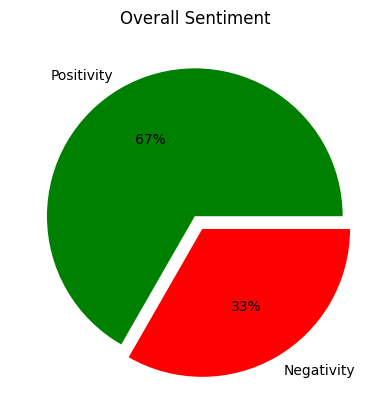

In [44]:
plt.pie([positive_sentiment,negative_sentiment], labels=['Positivity','Negativity'], explode=[0,0.1], colors=['green','red'], autopct='%.0f%%')
plt.title("Overall Sentiment")
plt.show()

# *Conclusion*

- The insights were really interesting to look at!

- We first loaded the data as a .txt file coverted it using `preprocess` function.
- Then,  we added helper columns, manipulated datetime entries.
- Then, we remove special characters and URLs from the messages.
- Then, we started analysing our whatsapp data!

Here is what we looked at!

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist - Most active user had the least average message length ).**

**4. Top 10 users most sent media.**

**5. Top 10 most used emojis.**
- using the `emoji` module!

**6. Most active hours and weekdays.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

**8. Sentiment Analysis**
 - Translation of text
 - Assigning Positive and Negative Score to each text.
 - Visualizing Overall Sentiment
### That's it from my end! I hope you *learnt and enjoyed* a lot!

# *Thank You*
- [Ayush Kumar](https://www.linkedin.com/in/singhayush16)